## Estudo sobre a deteção de diabetes usando uma amostra de Pima Indian Diabetes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, auc
from sklearn.metrics import precision_recall_curve

In [2]:
D = pickle.load(open('pimaDiabetes.p', 'rb'))

X = D.data
y = D.target

In [3]:
D.DESCR

'This dataset is originally from the National\nInstitute of Diabetes and Digestive and Kidney Diseases.\nThe objective of the dataset is to diagnostically predict\nwhether or not a patient has diabetes, based on certain\ndiagnostic measurements included in the dataset.\nSeveral constraints were placed on the selection of these\ninstances from a larger database. In particular, all patients\nhere are females at least 21 years old of Pima Indian heritage.\nThe dataset contains information of 768 women from a population\nnear Phoenix, Arizona, USA. The outcome tested was Diabetes,\n268 tested positive and 500 tested negative.\n\nFor more inforamtion:\nSmith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S.\n(1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.\nIn Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265).\nIEEE Computer Society Press.'

In [4]:
D.feature_names

['Number of times pregnant',
 'Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)',
 'Diastolic Blood Pressure (mm Hg)',
 'Triceps skin fold thickness (mm)',
 '2-Hour Serum insulin (µh/ml)',
 'Body mass index [weight in kg/(Height in m)]',
 'Diabetes pedigree function',
 'Age (years)']

##### Características:
1. Número de gravidezes
2. Concentração de glicose plasmática em 2 horas num teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra cutânea do tríceps (mm)
5. Nível sérico de insulina em 2 horas (µh/ml)
6. Índice de massa corporal (peso em kg/altura em m)
7. Diabetes Pedigree Function (predisposição genética devido ao impacto histórico familiar)
8. Idade (anos)

In [5]:
X.dtype

dtype('float64')

In [6]:
print('número total de ausência de diabetes:', np.sum(y == 0))

número total de ausência de diabetes: 500


In [7]:
print('número total de presença de diabetes:', np.sum(y == 1))

número total de presença de diabetes: 268


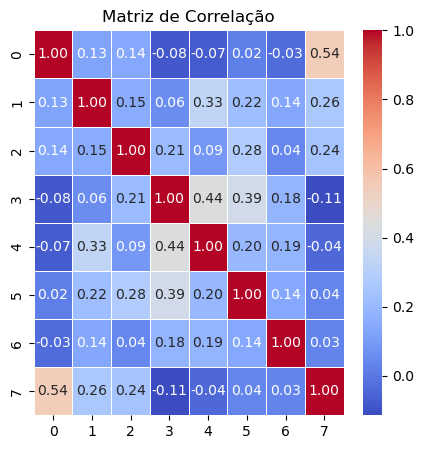

In [8]:
correlacao = np.corrcoef(X, rowvar=False)

plt.figure(figsize=(5, 5))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [9]:
# normalizar os dados
scaler = StandardScaler()
dados_standard = scaler.fit_transform(X)

In [10]:
# divisão dos dados em conjuntos de treino e de teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(dados_standard, y, test_size=0.2, random_state=35)

# 0.2 é usado para dividir o conjunto de treino com 80% dos dados e os outros 20% para teste
# 35 é um número arbitrário que escolhi para embaralhar os dados e serem escolhidos valores aleatórios

In [11]:
# treinar o modelo
modelo1 = LogisticRegression()
modelo1.fit(X_train1, y_train1)

LogisticRegression()

In [12]:
# previsões no conjunto de teste
previsoes1 = modelo1.predict(X_test1)

In [13]:
# normalizar os dados
scaler = StandardScaler()
dados_standard = scaler.fit_transform(X)

# divisão dos dados em conjuntos de treino e de teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(dados_standard, y, test_size=0.2, random_state=35)

# treinar o modelo 
modelo2 = RandomForestClassifier(random_state=35) # 35 é um número arbitrário
modelo2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=35)

In [14]:
# previsões no conjunto de teste
previsoes2 = modelo2.predict(X_test2)

In [15]:
# normalizar os dados
scaler = StandardScaler()
dados_standard = scaler.fit_transform(X)

# divisão dos dados em conjuntos de treino e de teste
X_train3, X_test3, y_train3, y_test3 = train_test_split(dados_standard, y, test_size=0.2, random_state=35)

# treinar o modelo 
k = 5  # o 'k' é um número arbitrário e eu escolhi a comparação com 5 vizinhos
modelo3 = KNeighborsClassifier(n_neighbors=k)
modelo3.fit(X_train3, y_train3)

KNeighborsClassifier()

In [16]:
# previsões no conjunto de teste
previsoes3 = modelo3.predict(X_test3)

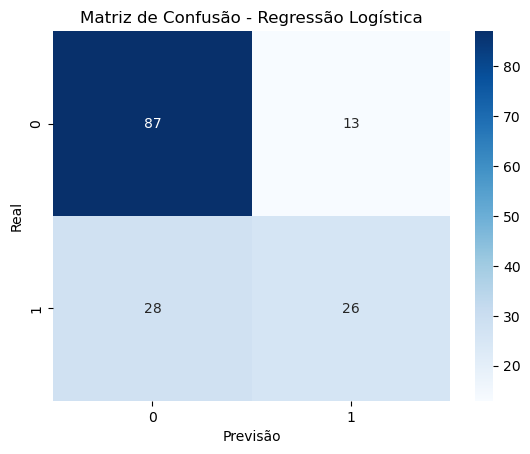

In [17]:
matrizconf1 = confusion_matrix(y_test1, previsoes1)
sns.heatmap(matrizconf1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

AUC: 0.806


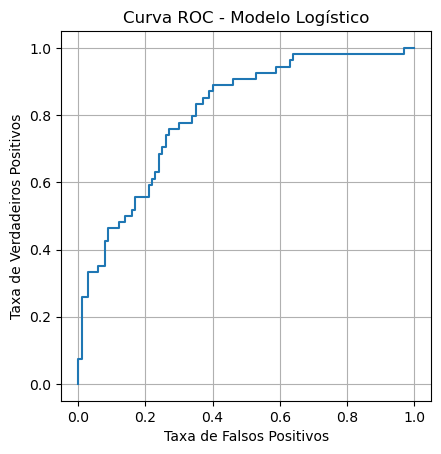

In [18]:
# prever as probabilidades
probs1 = modelo1.predict_proba(X_test1)[:, 1] # é a probabilidade da classe positiva
# vamos usar o '.predict_proba()' para fazer a curva roc, no caso da matriz de confusão usamos o 'predict()'

# calcular a curva ROC
fp1, tp1, t1 = roc_curve(y_test1, probs1)

# Calcular a AUC
roc_auc = auc(fp1, tp1) # área sob a curva

# representação gráfica da curva ROC
print('AUC:', np.round(roc_auc, 3))
plt.plot(fp1, tp1)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelo Logístico')
plt.axis('scaled')
plt.grid(True)
plt.show()

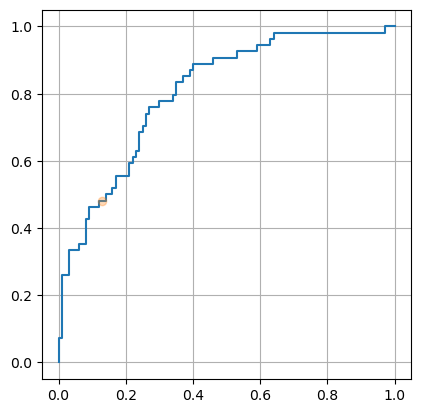

([<matplotlib.lines.Line2D at 0x19a23390f50>],
 (-0.05, 1.05, -0.05, 1.05),
 None,
 None)

In [19]:
plt.plot(fp1, tp1), plt.plot(13/100, 26/54 ,'o', alpha = 0.3), plt.axis('scaled'), plt.grid(True), plt.show()

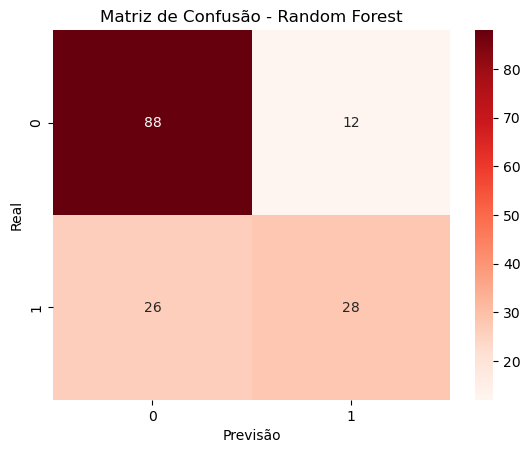

In [20]:
matrizconf2 = confusion_matrix(y_test2, previsoes2)
sns.heatmap(matrizconf2, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

AUC: 0.817


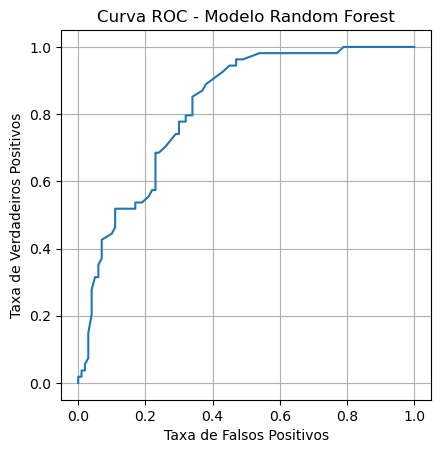

In [21]:
# prever as probabilidades
probs2 = modelo2.predict_proba(X_test2)[:, 1] # é a probabilidade da classe positiva

# calcular a curva ROC
fp2, tp2, t2 = roc_curve(y_test2, probs2)

# calcular a AUC
roc_auc = auc(fp2, tp2) # área sob a curva

# representação gráfica da curva ROC
print('AUC:', np.round(roc_auc, 3))
plt.plot(fp2, tp2)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelo Random Forest')
plt.axis('scaled')
plt.grid(True)
plt.show()

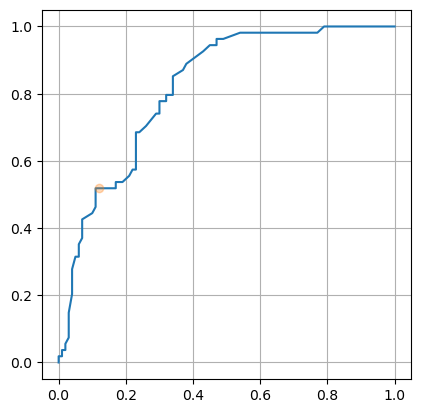

([<matplotlib.lines.Line2D at 0x19a2330a2d0>],
 (-0.05, 1.05, -0.05, 1.05),
 None,
 None)

In [22]:
plt.plot(fp2, tp2), plt.plot(12/100, 28/(26+28) ,'o', alpha = 0.3), plt.axis('scaled'), plt.grid(True), plt.show()

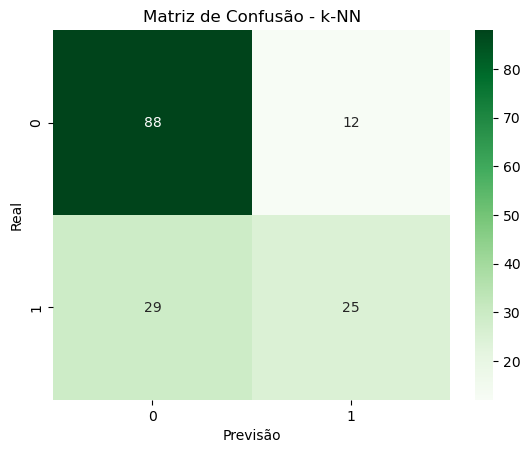

In [23]:
matrizconf3 = confusion_matrix(y_test3, previsoes3)
sns.heatmap(matrizconf3, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - k-NN')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

AUC: 0.773


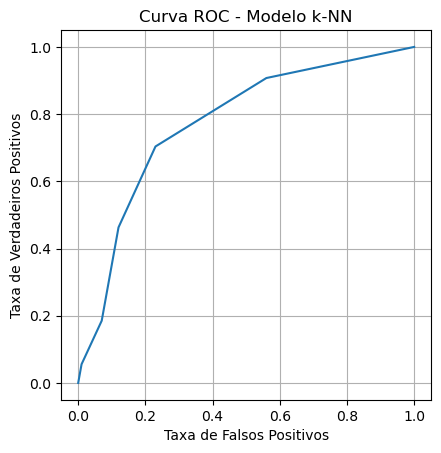

In [24]:
# prever as probabilidades
probs3 = modelo3.predict_proba(X_test3)[:, 1] # é a probabilidade da classe positiva

# calcular a curva ROC
fp3, tp3, t3 = roc_curve(y_test3, probs3)

# calcular a AUC
roc_auc = auc(fp3, tp3) # área sob a curva

# Plotar a curva ROC
print('AUC:', np.round(roc_auc, 3))
plt.plot(fp3, tp3)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Modelo k-NN')
plt.axis('scaled')
plt.grid(True)
plt.show()

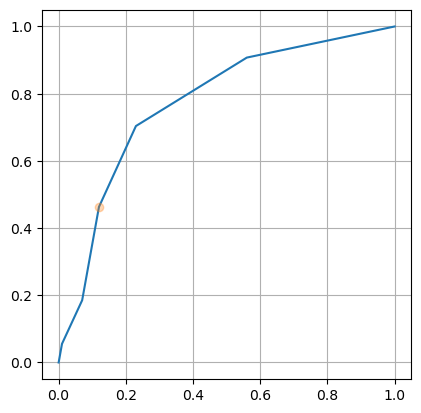

([<matplotlib.lines.Line2D at 0x19a2457a310>],
 (-0.05, 1.05, -0.05, 1.05),
 None,
 None)

In [25]:
plt.plot(fp3, tp3), plt.plot(12/100, 25/(25+29) ,'o', alpha = 0.3), plt.axis('scaled'), plt.grid(True), plt.show()

In [26]:
print('MODELO LOGÍSTICO')
print(classification_report(y_test1, previsoes1))

MODELO LOGÍSTICO
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



In [27]:
print('RANDOM FOREST')
print(classification_report(y_test2, previsoes2))

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [28]:
print('K-NN')
print(classification_report(y_test3, previsoes3))

K-NN
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.68      0.46      0.55        54

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154




Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



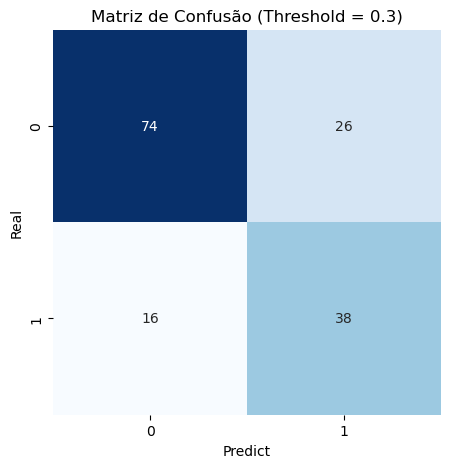

In [29]:
threshold = 0.3
predictions = (probs1 >= threshold).astype(int) #probabilidade do modelo 1

# avaliar o modelo com o threshold escolhido
matriz_conf = confusion_matrix(y_test1, predictions)
report = classification_report(y_test1, predictions)
print("\nRelatório de Classificação:")
print(report)

# visualizar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusão (Threshold = {threshold})')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       100
           1       0.57      0.78      0.66        54

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.71      0.72       154



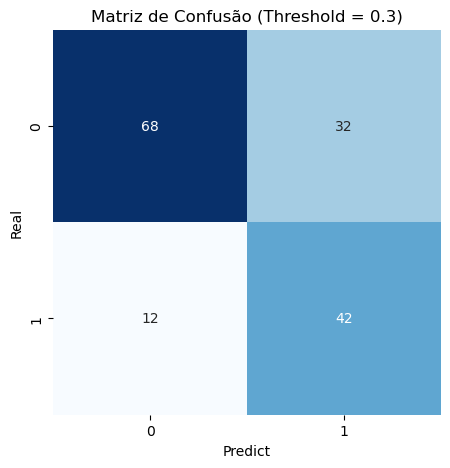

In [30]:
threshold = 0.3
predictions = (probs2 >= threshold).astype(int)

# avaliar o modelo com o threshold escolhido
matriz_conf = confusion_matrix(y_test2, predictions)
report = classification_report(y_test2, predictions)
print("\nRelatório de Classificação:")
print(report)

# visualizar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusão (Threshold = {threshold})')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



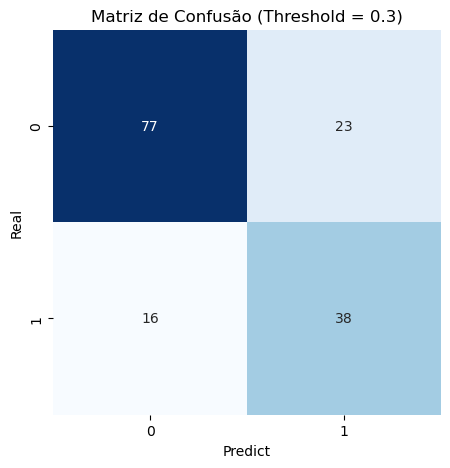

In [31]:
threshold = 0.3 # ou talvez o 0.35
predictions = (probs3 >= threshold).astype(int)

# avaliar o modelo com o threshold escolhido
matriz_conf = confusion_matrix(y_test3, predictions)
report = classification_report(y_test3, predictions)
print("\nRelatório de Classificação:")
print(report)

# visualizar a matriz de confusão
plt.figure(figsize=(5, 5))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusão (Threshold = {threshold})')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

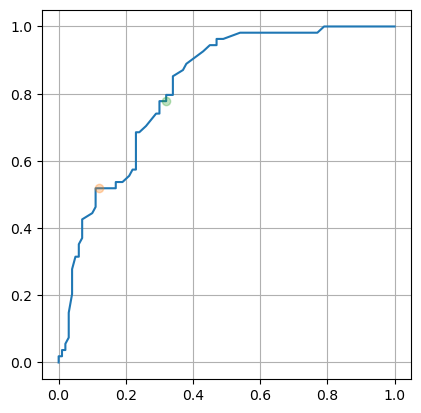

In [39]:
# comparação dos thresholds do modelo random forest antes e depois do ajuste (o modelo que se mostrou ser mais eficiente):

#plt.plot(fp2, tp2), plt.plot(12/100, 28/(26+28) ,'o', alpha = 0.3), plt.axis('scaled'), plt.grid(True), plt.show()
#plt.plot(fp2, tp2), plt.plot(32/(32+68), 42/(42+12) ,'o', alpha = 0.3), plt.axis('scaled'), plt.grid(True), plt.show()

plt.plot(fp2, tp2)
plt.plot(12/100, 28/(26+28), 'o', alpha=0.3)  # primeiro ponto - laranja
plt.plot(32/(32+68), 42/(42+12), 'o', alpha=0.3)  # segundo ponto - verde
plt.axis('scaled')
plt.grid(True)
plt.show()

In [33]:
# divisão dos dados em conjuntos de treino e de teste
X_train11, X_test11, y_train11, y_test11 = train_test_split(X, y, test_size=0.2, random_state=35)

# treinar o modelo
modelo1 = LogisticRegression(max_iter=200)
modelo1.fit(X_train11, y_train11)

# previsões no conjunto de teste
previsoes1 = modelo1.predict(X_test11)

In [34]:
# divisão dos dados em conjuntos de treino e de teste
X_train22, X_test22, y_train22, y_test22 = train_test_split(X, y, test_size=0.2, random_state=35)

# treinar o modelo 
modelo2 = RandomForestClassifier(random_state=35) # 35 é um número arbitrário
modelo2.fit(X_train22, y_train22)

# previsões no conjunto de teste
previsoes2 = modelo2.predict(X_test22)

In [35]:
# divisão dos dados em conjuntos de treino e de teste
X_train33, X_test33, y_train33, y_test33 = train_test_split(X, y, test_size=0.2, random_state=35)

# treinar o modelo 
k = 5  # o 'k' é um número arbitrário e eu escolhi a comparação com 5 vizinhos
modelo3 = KNeighborsClassifier(n_neighbors=k)
modelo3.fit(X_train33, y_train33)

# previsões no conjunto de teste
previsoes3 = modelo3.predict(X_test33)

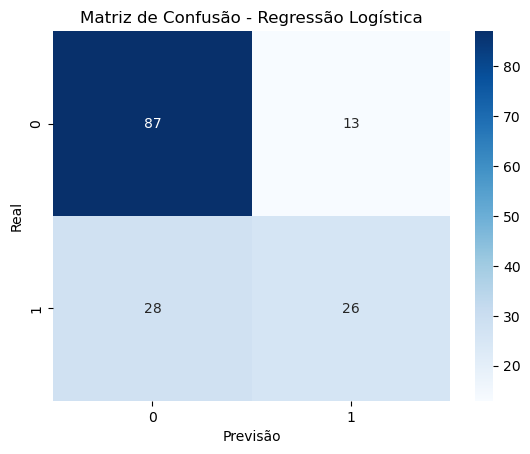

In [36]:
matrizconf1 = confusion_matrix(y_test11, previsoes1)
sns.heatmap(matrizconf1, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

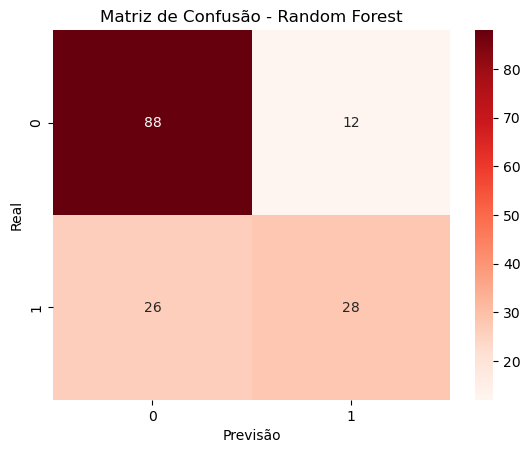

In [37]:
matrizconf2 = confusion_matrix(y_test22, previsoes2)
sns.heatmap(matrizconf2, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

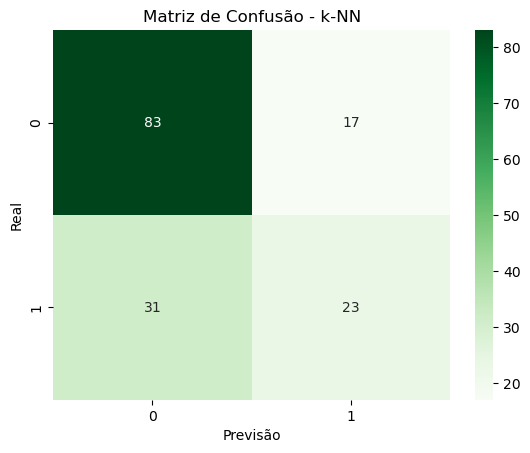

In [38]:
matrizconf3 = confusion_matrix(y_test33, previsoes3)
sns.heatmap(matrizconf3, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão - k-NN')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

#### Conclusão:

O modelo que se destacou como o mais eficaz neste estudo foi o Random Forest, que apresentou a melhor performance entre todos. A escolha do threshold de 0.3 mostrou-se útil para otimizar os resultados. Contudo, algumas limitações devem ser destacadas, como o facto de o estudo se focar exclusivamente em mulheres indígenas Pima com diabetes tipo 2, o que limita a generalização dos resultados para outros grupos, faixas etárias ou para a diabetes tipo 1. Além disso, a qualidade dos dados, a possibilidade de variáveis não consideradas e o tamanho relativamente pequeno da amostra podem ter influenciado as previsões. Por fim, o desempenho dos modelos poderia ser melhorado com um conjunto de dados maior e a inclusão de mais variáveis relevantes para o tratamento e controlo da doença, embora os modelos tenham sido eficazes.